In [1]:
import pandas as pd 
import re 

In [2]:
f = open('WhatsApp Chat with Khana khajana.txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(type(data))

<class 'str'>


In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern,data)[1:]

In [7]:
dates = re.findall(pattern,data)

In [8]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

In [9]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-05-20 15:34:00
1,"Amritansh Gupta CE created group ""Khana khajan...",2023-01-28 18:09:00
2,You were added\n,2023-01-28 18:09:00
3,Abhinav Srivastava Ce: Kal movie dekhne kon ko...,2023-05-20 19:54:00
4,Piyush Nayak: Ticket kitna hai ?\n,2023-05-20 19:55:00


In [10]:
df.shape

(3821, 2)

In [11]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
    
df.head()

,date,user,message
0,2023-05-20 15:34:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-01-28 18:09:00,group_notification,"Amritansh Gupta CE created group ""Khana khajan..."
2,2023-01-28 18:09:00,group_notification,You were added\n
3,2023-05-20 19:54:00,Abhinav Srivastava Ce,Kal movie dekhne kon kon chalega\nFast X\nMaha...
4,2023-05-20 19:55:00,Piyush Nayak,Ticket kitna hai ?\n


In [12]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [13]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2023-05-20 15:34:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-05-20,2023,5,May,20,Saturday,15,34
1,2023-01-28 18:09:00,group_notification,"Amritansh Gupta CE created group ""Khana khajan...",2023-01-28,2023,1,January,28,Saturday,18,9
2,2023-01-28 18:09:00,group_notification,You were added\n,2023-01-28,2023,1,January,28,Saturday,18,9
3,2023-05-20 19:54:00,Abhinav Srivastava Ce,Kal movie dekhne kon kon chalega\nFast X\nMaha...,2023-05-20,2023,5,May,20,Saturday,19,54
4,2023-05-20 19:55:00,Piyush Nayak,Ticket kitna hai ?\n,2023-05-20,2023,5,May,20,Saturday,19,55


In [14]:
x = df['user'].value_counts().head()

In [15]:
x

Hansadhwaja Biswal CE    452
Aditya Mishra Ce         437
Piyush Nayak             421
Anurag Mishra CE         311
Hanmant Kautkar          233
Name: user, dtype: int64

In [16]:
import matplotlib.pyplot as plt

In [17]:
name = x.index
count = x.values

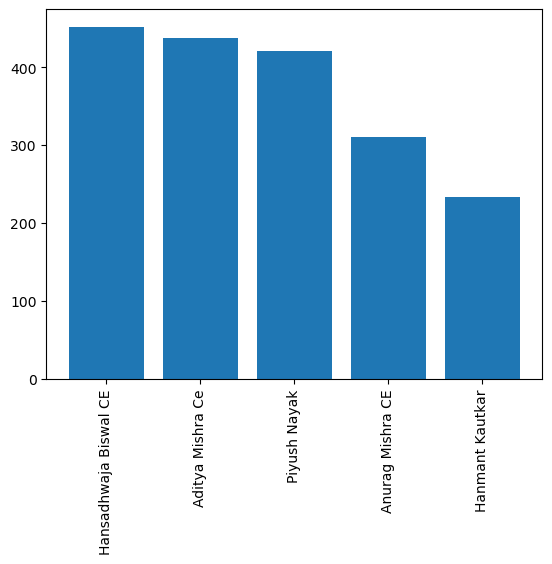

In [18]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
round((df['user'].value_counts().head()/df.shape[0])*100,2).reset_index().rename({'index':'name','user':'percent'})

,index,user
0,Hansadhwaja Biswal CE,11.83
1,Aditya Mishra Ce,11.44
2,Piyush Nayak,11.02
3,Anurag Mishra CE,8.14
4,Hanmant Kautkar,6.10


In [20]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message']!='<Media omitted>\n']

In [21]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [22]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [23]:
# words = []
# for message in df['message']:
#     words.extend(message.split())

In [24]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,},444
1,{,340
2,=,271
3,class,215
4,import,171
5,message,123
6,/*,110
7,package,110
8,*/,110
9,for(int,108


In [25]:
!pip install emoji

In [26]:
import emoji

In [27]:
!pip install --upgrade emoji


In [28]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])


In [29]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😆,692
1,💖,155
2,💚,153
3,💜,153
4,💙,150
...,...,...
118,👨,1
119,📱,1
120,💵,1
121,💰,1


In [30]:
df['month_num'] = df['date'].dt.month

In [31]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2023-05-20 15:34:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-05-20,2023,5,May,20,Saturday,15,34
1,2023-01-28 18:09:00,group_notification,"Amritansh Gupta CE created group ""Khana khajan...",2023-01-28,2023,1,January,28,Saturday,18,9
2,2023-01-28 18:09:00,group_notification,You were added\n,2023-01-28,2023,1,January,28,Saturday,18,9
3,2023-05-20 19:54:00,Abhinav Srivastava Ce,Kal movie dekhne kon kon chalega\nFast X\nMaha...,2023-05-20,2023,5,May,20,Saturday,19,54
4,2023-05-20 19:55:00,Piyush Nayak,Ticket kitna hai ?\n,2023-05-20,2023,5,May,20,Saturday,19,55
...,...,...,...,...,...,...,...,...,...,...,...
3816,2024-03-26 14:23:00,Sovan Kumar CE 25,<Media omitted>\n,2024-03-26,2024,3,March,26,Tuesday,14,23
3817,2024-03-26 15:10:00,Nitin Yadav CE,This message was deleted\n,2024-03-26,2024,3,March,26,Tuesday,15,10
3818,2024-03-26 15:18:00,Nitin Yadav CE,This message was deleted\n,2024-03-26,2024,3,March,26,Tuesday,15,18
3819,2024-03-26 15:23:00,Vedansh CE,🤣\n,2024-03-26,2024,3,March,26,Tuesday,15,23


In [32]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2023,1,January,2
1,2023,5,May,228
2,2023,6,June,235
3,2023,7,July,162
4,2023,8,August,267
5,2023,9,September,370
6,2023,10,October,410
7,2023,11,November,787
8,2023,12,December,328
9,2024,1,January,253


In [33]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [34]:
time

['January-2023',
 'May-2023',
 'June-2023',
 'July-2023',
 'August-2023',
 'September-2023',
 'October-2023',
 'November-2023',
 'December-2023',
 'January-2024',
 'February-2024',
 'March-2024']

In [35]:
timeline['time'] = time

In [36]:
timeline

,year,month_num,month,message,time
0,2023,1,January,2,January-2023
1,2023,5,May,228,May-2023
2,2023,6,June,235,June-2023
3,2023,7,July,162,July-2023
4,2023,8,August,267,August-2023
5,2023,9,September,370,September-2023
6,2023,10,October,410,October-2023
7,2023,11,November,787,November-2023
8,2023,12,December,328,December-2023
9,2024,1,January,253,January-2024


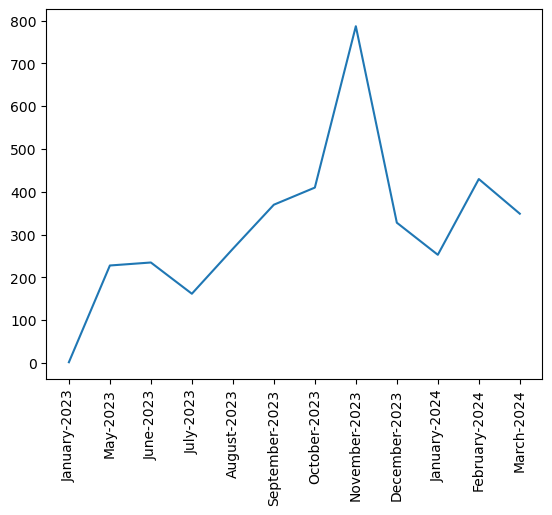

In [37]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
df['date'].dt.date 

0       2023-05-20
1       2023-01-28
2       2023-01-28
3       2023-05-20
4       2023-05-20
           ...    
3816    2024-03-26
3817    2024-03-26
3818    2024-03-26
3819    2024-03-26
3820    2024-03-26
Name: date, Length: 3821, dtype: object

In [39]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2023-05-20 15:34:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-05-20,2023,5,May,20,Saturday,15,34
1,2023-01-28 18:09:00,group_notification,"Amritansh Gupta CE created group ""Khana khajan...",2023-01-28,2023,1,January,28,Saturday,18,9
2,2023-01-28 18:09:00,group_notification,You were added\n,2023-01-28,2023,1,January,28,Saturday,18,9
3,2023-05-20 19:54:00,Abhinav Srivastava Ce,Kal movie dekhne kon kon chalega\nFast X\nMaha...,2023-05-20,2023,5,May,20,Saturday,19,54
4,2023-05-20 19:55:00,Piyush Nayak,Ticket kitna hai ?\n,2023-05-20,2023,5,May,20,Saturday,19,55
...,...,...,...,...,...,...,...,...,...,...,...
3816,2024-03-26 14:23:00,Sovan Kumar CE 25,<Media omitted>\n,2024-03-26,2024,3,March,26,Tuesday,14,23
3817,2024-03-26 15:10:00,Nitin Yadav CE,This message was deleted\n,2024-03-26,2024,3,March,26,Tuesday,15,10
3818,2024-03-26 15:18:00,Nitin Yadav CE,This message was deleted\n,2024-03-26,2024,3,March,26,Tuesday,15,18
3819,2024-03-26 15:23:00,Vedansh CE,🤣\n,2024-03-26,2024,3,March,26,Tuesday,15,23


In [40]:
daily_time = df.groupby('only_date').count()['message'].reset_index()
daily_time

,only_date,message
0,2023-01-28,2
1,2023-05-20,29
2,2023-05-21,53
3,2023-05-22,51
4,2023-05-23,9
...,...,...
236,2024-03-22,20
237,2024-03-23,20
238,2024-03-24,8
239,2024-03-25,9


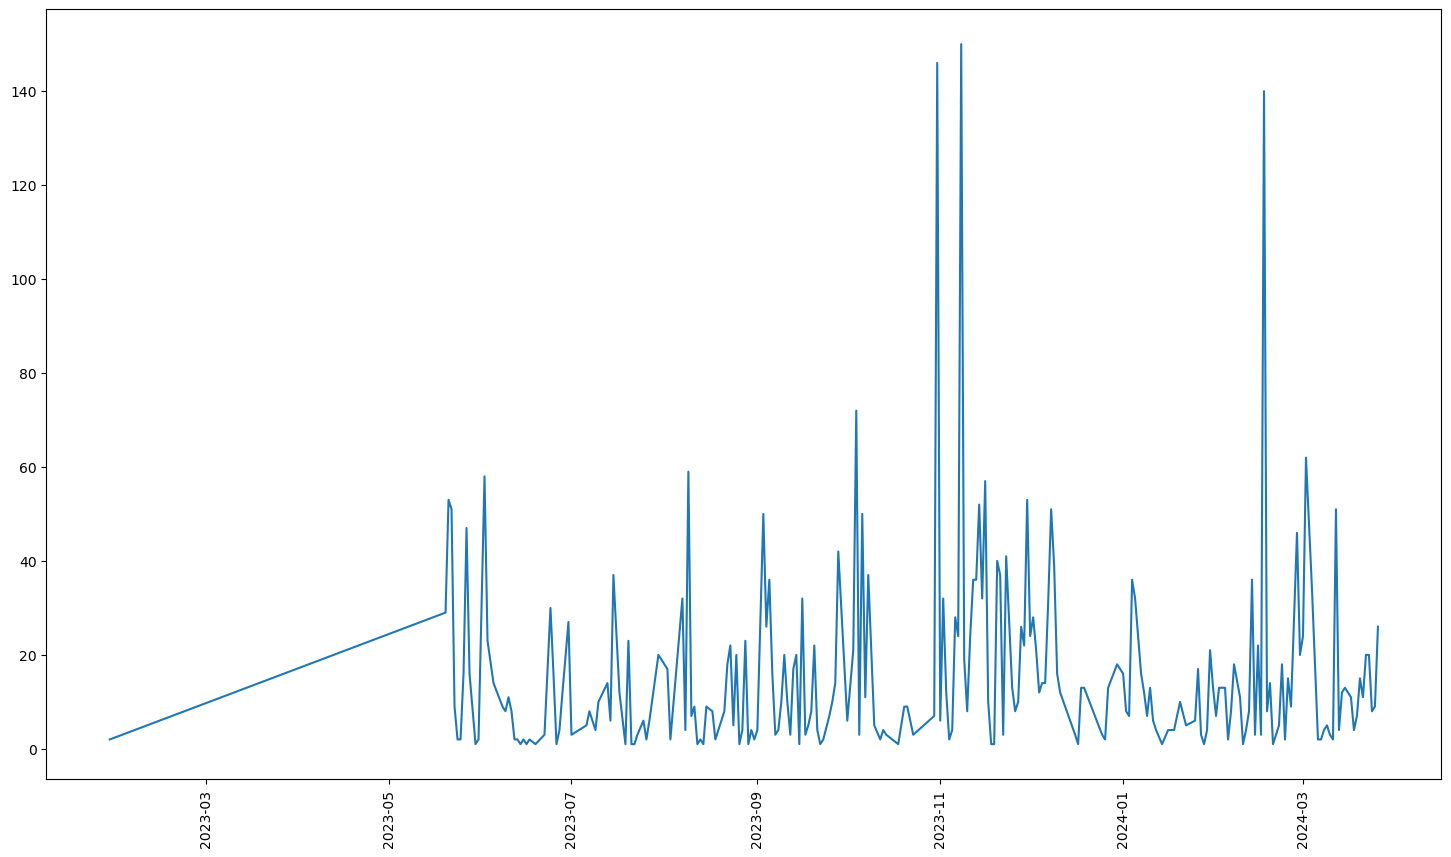

In [41]:
plt.figure(figsize=(18,10))
plt.plot(daily_time['only_date'],daily_time['message'])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
df['day_name'].value_counts()

Wednesday    628
Saturday     625
Tuesday      620
Thursday     526
Monday       507
Friday       500
Sunday       415
Name: day_name, dtype: int64

In [43]:
df['month'].value_counts()

November     787
February     430
October      410
September    370
March        349
December     328
August       267
January      255
June         235
May          228
July         162
Name: month, dtype: int64

In [44]:
df[['day_name','hour']]['hour']

0       15
1       18
2       18
3       19
4       19
        ..
3816    14
3817    15
3818    15
3819    15
3820    15
Name: hour, Length: 3821, dtype: int64

In [45]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2023-05-20 15:34:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-05-20,2023,5,May,20,Saturday,15,34,15-16
1,2023-01-28 18:09:00,group_notification,"Amritansh Gupta CE created group ""Khana khajan...",2023-01-28,2023,1,January,28,Saturday,18,9,18-19
2,2023-01-28 18:09:00,group_notification,You were added\n,2023-01-28,2023,1,January,28,Saturday,18,9,18-19
3,2023-05-20 19:54:00,Abhinav Srivastava Ce,Kal movie dekhne kon kon chalega\nFast X\nMaha...,2023-05-20,2023,5,May,20,Saturday,19,54,19-20
4,2023-05-20 19:55:00,Piyush Nayak,Ticket kitna hai ?\n,2023-05-20,2023,5,May,20,Saturday,19,55,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...
3816,2024-03-26 14:23:00,Sovan Kumar CE 25,<Media omitted>\n,2024-03-26,2024,3,March,26,Tuesday,14,23,14-15
3817,2024-03-26 15:10:00,Nitin Yadav CE,This message was deleted\n,2024-03-26,2024,3,March,26,Tuesday,15,10,15-16
3818,2024-03-26 15:18:00,Nitin Yadav CE,This message was deleted\n,2024-03-26,2024,3,March,26,Tuesday,15,18,15-16
3819,2024-03-26 15:23:00,Vedansh CE,🤣\n,2024-03-26,2024,3,March,26,Tuesday,15,23,15-16


In [46]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-00,3-4,4-5,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,28.0,9.0,21.0,17.0,22.0,35.0,47.0,30.0,50.0,28.0,...,23.0,41.0,59.0,4.0,0.0,0.0,4.0,5.0,12.0,11.0
Monday,59.0,5.0,43.0,69.0,21.0,36.0,47.0,6.0,16.0,9.0,...,17.0,25.0,12.0,12.0,2.0,0.0,0.0,0.0,5.0,23.0
Saturday,45.0,15.0,13.0,18.0,32.0,24.0,76.0,34.0,5.0,27.0,...,43.0,153.0,36.0,16.0,1.0,0.0,6.0,2.0,42.0,6.0
Sunday,44.0,2.0,37.0,12.0,26.0,7.0,18.0,27.0,19.0,5.0,...,31.0,78.0,19.0,5.0,0.0,1.0,1.0,4.0,6.0,4.0
Thursday,58.0,1.0,25.0,51.0,41.0,25.0,23.0,47.0,44.0,5.0,...,27.0,50.0,32.0,16.0,0.0,1.0,1.0,1.0,16.0,12.0
Tuesday,4.0,6.0,25.0,29.0,4.0,18.0,46.0,41.0,28.0,50.0,...,78.0,39.0,17.0,14.0,0.0,0.0,3.0,1.0,5.0,28.0
Wednesday,18.0,43.0,37.0,74.0,27.0,5.0,10.0,16.0,16.0,9.0,...,17.0,133.0,44.0,78.0,0.0,1.0,0.0,1.0,17.0,5.0


### Analysing the sentiments

In [48]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2023-05-20 15:34:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-05-20,2023,5,May,20,Saturday,15,34,15-16
1,2023-01-28 18:09:00,group_notification,"Amritansh Gupta CE created group ""Khana khajan...",2023-01-28,2023,1,January,28,Saturday,18,9,18-19
2,2023-01-28 18:09:00,group_notification,You were added\n,2023-01-28,2023,1,January,28,Saturday,18,9,18-19
3,2023-05-20 19:54:00,Abhinav Srivastava Ce,Kal movie dekhne kon kon chalega\nFast X\nMaha...,2023-05-20,2023,5,May,20,Saturday,19,54,19-20
4,2023-05-20 19:55:00,Piyush Nayak,Ticket kitna hai ?\n,2023-05-20,2023,5,May,20,Saturday,19,55,19-20


In [50]:
!pip install nltk

In [61]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

In [62]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()

In [63]:
df["positive"]=[sentiments.polarity_scores(i)["pos"] for i in df["message"]]
df["negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["message"]]
df["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["message"]]

df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period,positive,negative,neutral
0,2023-05-20 15:34:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-05-20,2023,5,May,20,Saturday,15,34,15-16,0.00,0.084,0.916
1,2023-01-28 18:09:00,group_notification,"Amritansh Gupta CE created group ""Khana khajan...",2023-01-28,2023,1,January,28,Saturday,18,9,18-19,0.25,0.000,0.750
2,2023-01-28 18:09:00,group_notification,You were added\n,2023-01-28,2023,1,January,28,Saturday,18,9,18-19,0.00,0.000,1.000
3,2023-05-20 19:54:00,Abhinav Srivastava Ce,Kal movie dekhne kon kon chalega\nFast X\nMaha...,2023-05-20,2023,5,May,20,Saturday,19,54,19-20,0.00,0.000,1.000
4,2023-05-20 19:55:00,Piyush Nayak,Ticket kitna hai ?\n,2023-05-20,2023,5,May,20,Saturday,19,55,19-20,0.00,0.000,1.000


In [69]:
df.info

<bound method DataFrame.info of                     date                   user  \
0    2023-05-20 15:34:00     group_notification   
1    2023-01-28 18:09:00     group_notification   
2    2023-01-28 18:09:00     group_notification   
3    2023-05-20 19:54:00  Abhinav Srivastava Ce   
4    2023-05-20 19:55:00           Piyush Nayak   
...                  ...                    ...   
3816 2024-03-26 14:23:00      Sovan Kumar CE 25   
3817 2024-03-26 15:10:00         Nitin Yadav CE   
3818 2024-03-26 15:18:00         Nitin Yadav CE   
3819 2024-03-26 15:23:00             Vedansh CE   
3820 2024-03-26 15:23:00             Vedansh CE   

                                                message   only_date  year  \
0     Messages and calls are end-to-end encrypted. N...  2023-05-20  2023   
1     Amritansh Gupta CE created group "Khana khajan...  2023-01-28  2023   
2                                      You were added\n  2023-01-28  2023   
3     Kal movie dekhne kon kon chalega\nFast X\